# **Capstone Project C22-098: Image Classification**

## **Summary & Goals**

Fruity has the main feature of classifying fruit quality by predicting the input image and classify image into one of six classes. The results of the classification must indicate whether the quality of the fruit is rotten or fresh, such as fresh apples, rotten bananas, etc.

## **Machine Learning Phase - Model Development**

### **Data Preparation**

1. Load the required libraries, The main library used is Tensorflow, which is a free and open source software library for machine learning and artificial intelligence. It can be used across a wide range of tasks but has a particular focus on deep neural network training and inference.

2. Data Loading, This dataset contains image data of fruits. With six classes namely:,
  - `Fresh Apples`: 1693 images,
  - `Fresh Bananas`: 1581 images,
  - `Fresh Oranges`: 1466 images,
  - `Rotten Apples`: 2342 images,
  - `Rotten Bananas`: 2224 images,
  - `Rotten Oranges`: 1595 images,

3. Image Augmentation, Deep networks need large amount of training data to achieve good performance. To build a powerful image classifier using very small training data, image augmentation is usually required to boost the performance of deep networks. In this code, image augmentation artificially creates training images through rescale image.

### **Modelling Process**

4. Create object model's. In this case, the model uses 12 layers of Keras' Dense layer. The model architecture's is built on top of the Feature Extraction Layer and Fully-Connected Layer (MLP). The feature extraction layer consists of two parts, **convolutional** and **pooling layers**. Meanwhile, for most of the layers, the activation function used in the model is **ReLu**. In the last layer, the **softmax** activation is used to perform multi-class classification.

5. Compile the model. The loss used in this optimization is categorical cross-entropy. To fit this model better, the Adamax optimizer is used with accuracy as the metric.

6. Define the callbacks function. callback is used to stop train while the accuracy has reached the threshold of the accuracy (in this scoop is 0.99). This function is very helpful to save program runtime without requiring the training to finish at the last epoch.

7. Define checkpoint function. This checkpoint is used to save best model after each iteration. The model is stored in the models folder in the form of a .h5 file.

8. Model fit for train. Keras fit is the method used for the model training on the data set. In this case, fit the model with the epoch of 30.

### **Evaluating Model Performance**

9. Plot accuracy models. The plot on the graph shows accuracy of train set and the test set. If the accuracy continues to increase, then the model is good fit and vice-versa. However, it could be that increase in accuracy on train set is not followed by the accuracy on test set. This will cause the model to overfit.

10. Plot loss models. As the opposite of accuracy, the plot is for loss of both the train set and the test set. If it continues to decrease, then the model is good-fit.

### **Saving Models**

11. The last model, the best model, is saved to an .h5 file, which will be used as baseline models.

## **Data Preparation**

These steps are the steps needed to prepare the data before it is used in the modelling process.

### **Import Libraries**

Install all required libraries using the import function.

In [ ]:
# import library
import os
import shutil
import random
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files

### **Remote Connection to Kaggle**

Configure remote and manage the connection from Kaggle to Google Colaboratory using API. This is done to retrieve datasets available on Kaggle for use in developing models in Colaboratory.

In [ ]:
# kaggle.json downloaded >> https://drive.google.com/file/d/1x5RMQ3yp049uZIxtIqNg3PwFqOqAAcu3/view?usp=share_link
! pip install gdown
! gdown 1x5RMQ3yp049uZIxtIqNg3PwFqOqAAcu3
! ls

In [ ]:
# Connect the Kaggle API client
! pip install -q kaggle

# move API client in ~/.kaggle
! mkdir ~/.kaggle
! cp "/content/kaggle.json" ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

# dataset downloaded >> https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
! kaggle datasets download sriramr/fruits-fresh-and-rotten-for-classification

### **Data Extraction**

Process of obtaining data from multiple sources, and moving it to a new destination designed to support analytical processing

In [ ]:
# extract the zip file
local_zip = "/content/fruits-fresh-and-rotten-for-classification.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
# remove unused files
shutil.rmtree("/content/dataset/dataset")
os.remove("fruits-fresh-and-rotten-for-classification.zip")

size of image: (320, 374)


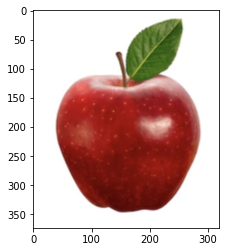

In [ ]:
# show sample files
image_path = os.listdir("/content/dataset/train/freshapples")
fruit_sample = random.choice(image_path)
img = tf.keras.preprocessing.image.load_img("/content/dataset/train/freshapples/" + fruit_sample)
plt.imshow(img)
print("size of image: {}".format(img.size))

### **Directory Specification**

Specify the directories that are going to be used. There are 2 directories, the train directory (defined as train_dir) and the validation directory (val_dir).

In [ ]:
# directory specification
base_dir = r"/content/dataset"

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "test")

# define label variables
labels = os.listdir(validation_dir)

### **Image Augmentation**

This process allows the model to receive new image variations at each epoch

In [ ]:
# data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [ ]:
# process image
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=15,
    class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=15,
    class_mode='categorical',)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


## **Modelling Process**

The modelling process is the main steps, as the modelling is the part where we make a new model based on the problem.

In [ ]:
# create sequential models
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])

In [ ]:
# optimizer and crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

In [ ]:
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9

In [ ]:
# callbacks & checkpoint functions
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') >= 0.99 and logs.get('val_accuracy') >= 0.99:
      print("\nTarget reached 99%. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

checkpoint_filepath = 'model/model_weights.{epoch:02d}-{val_loss:.3f}.h5'
checkpoint_save = tf.keras.callbacks.ModelCheckpoint(
                    filepath=checkpoint_filepath,
                    monitor='val_accuracy',
                    mode='max',
                    save_best_only=True)

In [ ]:
# models training
history=model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator,
      verbose=1,
      callbacks=[callbacks, checkpoint_save])

Epoch 1/30
727/727 [==============================] - 86s 101ms/step - loss: 0.7022 - accuracy: 0.7389 - val_loss: 0.4157 - val_accuracy: 0.8477
Epoch 2/30
727/727 [==============================] - 63s 86ms/step - loss: 0.3212 - accuracy: 0.8906 - val_loss: 0.2361 - val_accuracy: 0.9188
Epoch 3/30
727/727 [==============================] - 61s 84ms/step - loss: 0.2443 - accuracy: 0.9136 - val_loss: 0.1808 - val_accuracy: 0.9344
Epoch 4/30
727/727 [==============================] - 59s 81ms/step - loss: 0.1928 - accuracy: 0.9311 - val_loss: 0.1349 - val_accuracy: 0.9563
Epoch 5/30
727/727 [==============================] - 60s 82ms/step - loss: 0.1489 - accuracy: 0.9452 - val_loss: 0.1328 - val_accuracy: 0.9518
Epoch 6/30
727/727 [==============================] - 60s 82ms/step - loss: 0.1410 - accuracy: 0.9482 - val_loss: 0.1657 - val_accuracy: 0.9359
Epoch 7/30
727/727 [==============================] - 59s 81ms/step - loss: 0.1163 - accuracy: 0.9569 - val_loss: 0.1183 - val_accuracy

## **Evaluating Model Performance**

This evaluation process aims to evaluate the performance model, which can be seen through a graph, plot accuracy and plot losses.

### **Plotting Accuracy Metrics**

The graph shows that the accuracy of the model increases, both in the train and test set. It means that the model is fit.

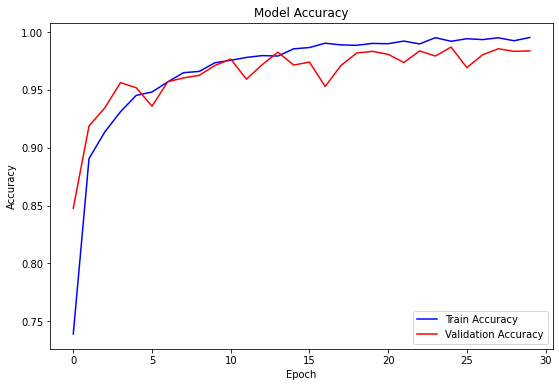

In [ ]:
# plotting accuracy metrics
plt.figure(figsize=(9,6))

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

acc = plt.plot(history.history['accuracy'], color='blue')
val_acc = plt.plot(history.history['val_accuracy'], color='red')

plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')

plt.show()

### **Plotting Loss Metrics**

In the graph, it can be seen that the loss function decreases in the train and test sets. This shows that the model is good-fit.

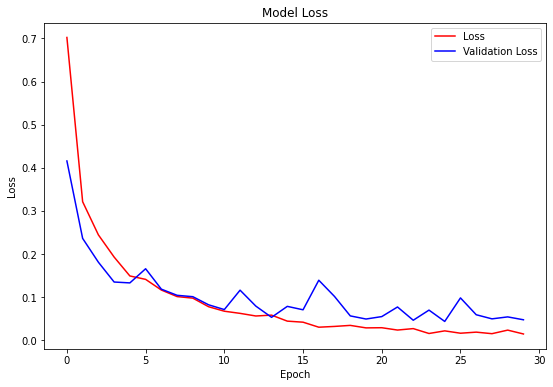

In [ ]:
# plotting loss metrics
plt.figure(figsize=(9,6))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

loss = plt.plot(history.history['loss'], color='red')
val_loss = plt.plot(history.history['val_loss'], color='blue')

plt.legend(['Loss', 'Validation Loss'], loc='upper right')

plt.show()

## **Saving Models**

The last model is the best model among the epoch saved into a .h5 file and TFLite.

In [ ]:
# model conversion
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

model.save("model.h5")

## **Predict Image**

Saving download (3).jpg to download (3).jpg
1/1 [==============================] - 0s 243ms/step
download (3).jpg is a Fresh Banana


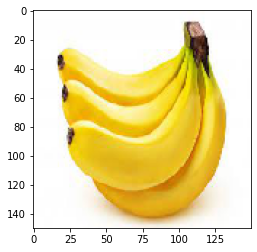

In [ ]:
# predict image
%matplotlib inline
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = tf.keras.utils.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  arr = model.predict(images, batch_size=10)
  if arr[0][0]==1:
    labels='Fresh Apple'
  elif arr[0][1]==1:
    labels='Fresh Banana'
  elif arr[0][2]==1:
    labels='Fresh Oranges'
  elif arr[0][3]==1:
    labels='Rotten Apple'
  elif arr[0][4]==1:
    labels='Rotten Banana'
  elif arr[0][5]==1:
    labels='Rotten Oranges'
print('{} is a {}'.format(fn,labels))

## **Conclusion**

Based on the evaluation of the accuracy and loss function graphs, the model created is very fit with accuracy and val_accuracy of more than 98%. So, we can use the model to predict data.